<h1 align="center">Linear Regression</h1>
<h2 align="center">Calculate Linear Regression from scratch</h2>
<h3 align="center">Rositsa Chankova</h3>

### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('swedish_insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
print(data.columns)
data.head(10)

Index(['X', 'Y'], dtype='object')


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


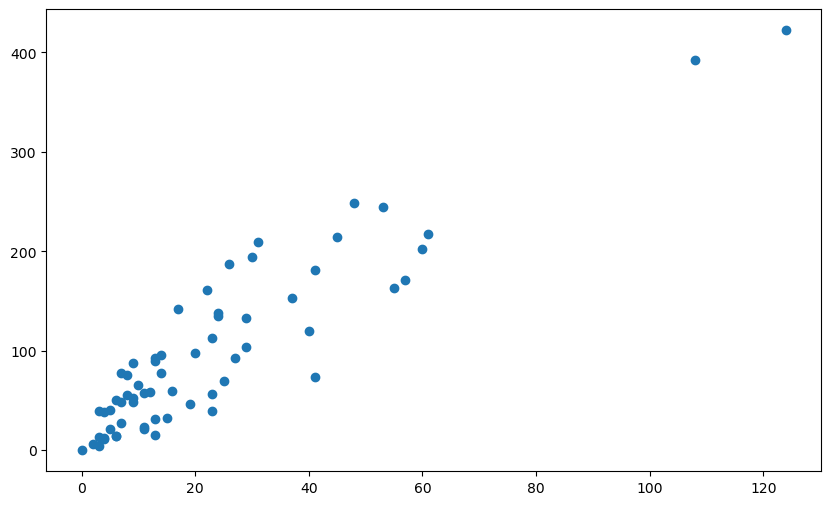

In [7]:
plt.figure(figsize=(10,6))
fig = plt.scatter(x = data['X'], y=data['Y'])
plt.show()

### 2. Calculate Mean and Variance:

In [10]:
mean_x = np.mean(data['X'])
mean_y = np.mean(data['Y'])

var_x = np.var(data['X'])
var_y = np.var(data['Y'])

print('x stats: mean= %.3f   variance= %.3f' % (mean_x, var_x))
print('y stats: mean= %.3f   variance= %.3f' % (mean_y, var_y))

x stats: mean= 22.905   variance= 536.658
y stats: mean= 98.187   variance= 7505.052


### 3. Calculate Covariance:

**The covariance of two groups of numbers describes how those numbers change together. Covariance is a generalization of correlation. Correlation describes the relationship between two groups of numbers, whereas covariance can describe the relationship between two or more groups of numbers.**

In [6]:
# Calculate covariance between x and y
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/len(x)

covar_xy = covariance(data['X'], data['Y'])
print(f'Cov(X,Y): {covar_xy}')

Cov(X,Y): 1832.0543461829182


### 4. Estimate Coefficients (the values for two coefficients) in simple linear regression:

In [7]:
b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents:\n b0: {b0}  b1: {b1} ')

Coefficents:
 b0: 19.99448575911481  b1: 3.413823560066367 


### 5. Make Predictions:

**The simple linear regression model is a line defined by coefficients estimated from training data. Once the coefficients are estimated, they can be used to make predictions. The equation to make predictions with a simple linear regression model is as follows:**

In [8]:
x = data['X'].values.copy()
x

array([108,  19,  13, 124,  40,  57,  23,  14,  45,  10,   5,  48,  11,
        23,   7,   2,  24,   6,   3,  23,   6,   9,   9,   3,  29,   7,
         4,  20,   7,   4,   0,  25,   6,   5,  22,  11,  61,  12,   4,
        16,  13,  60,  41,  37,  55,  41,  11,  27,   8,   3,  17,  13,
        13,  15,   8,  29,  30,  24,   9,  31,  14,  53,  26])

In [9]:
# Taking the values from the dataframe and sorting only X for the ease of plotting line later on
x = data['X'].values.copy()
# x.sort()
print(f'x: {x}')

# Predicting the new data based on calculated coeffiecents. 
y_hat = b0 + b1 * x
print(f'\n\ny_hat: {y_hat}')

y = data['Y'].values
print(f'\n\ny: {y}')

x: [108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]


y_hat: [388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.99536

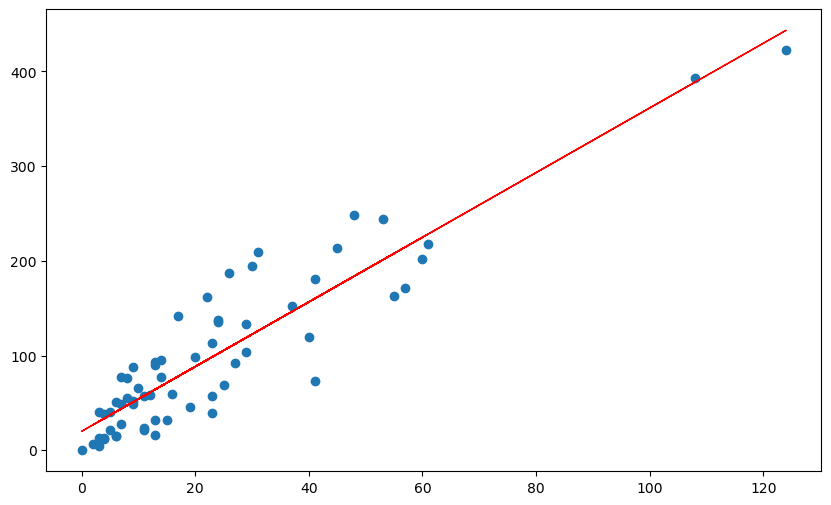

In [10]:
plt.figure(figsize=(10,6))
fig = plt.scatter(x = data['X'], y=data['Y'])
plt.plot(data['X'],y_hat, color='red', linewidth=1)
plt.show()


## Using Linear Regression Model from sklearn

In [11]:
data = pd.read_csv('swedish_insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [12]:
X = DataFrame(data, columns=['X'])
y = DataFrame(data, columns=['Y'])

In [13]:
regression = LinearRegression()

In [14]:
regression.fit(X, y) 

LinearRegression()

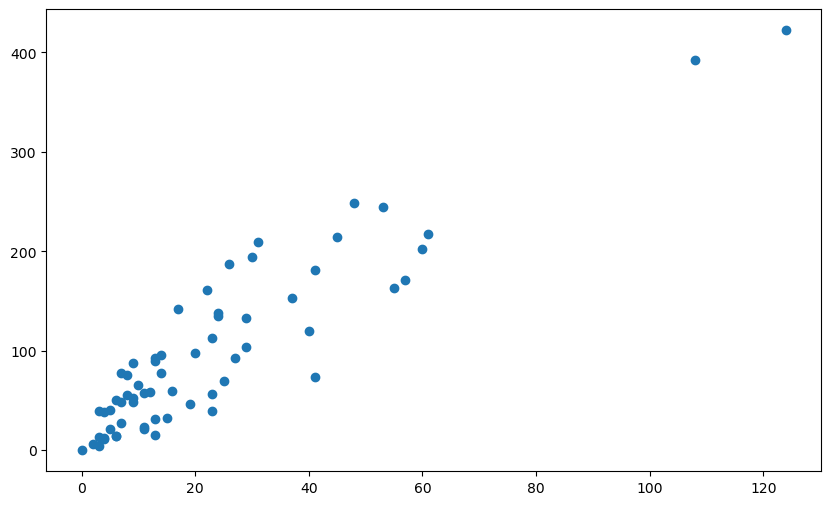

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.show()

In [16]:
regression.coef_

array([[3.41382356]])

In [17]:
regression.intercept_

array([19.99448576])

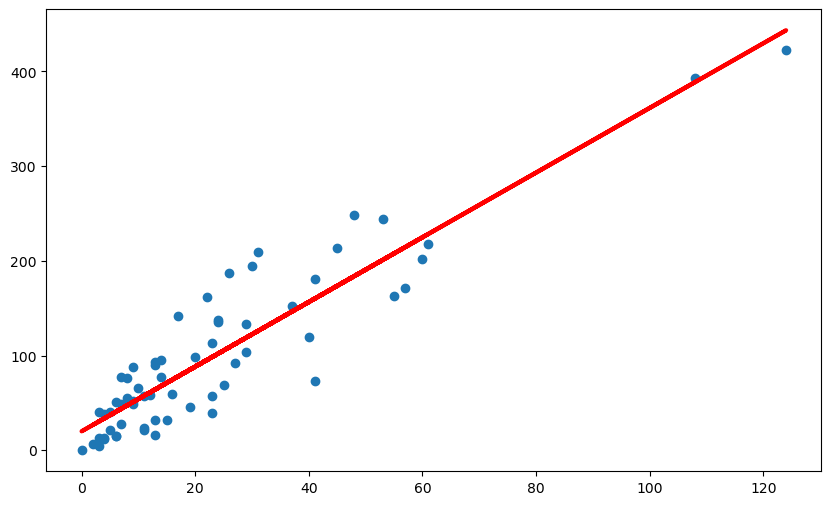

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)

# Adding the regression line here:
plt.plot(X.values, regression.predict(X), color='red', linewidth=3)
plt.show()

In [19]:
regression.score(X, y)

0.8333466719794502

In [20]:
a = np.linspace(2.0, 3.0, num=10)
a

array([2.        , 2.11111111, 2.22222222, 2.33333333, 2.44444444,
       2.55555556, 2.66666667, 2.77777778, 2.88888889, 3.        ])

In [21]:
type(a)

numpy.ndarray

In [22]:
b = np.linspace(5.0, 10.0, num=10)
b

array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ])

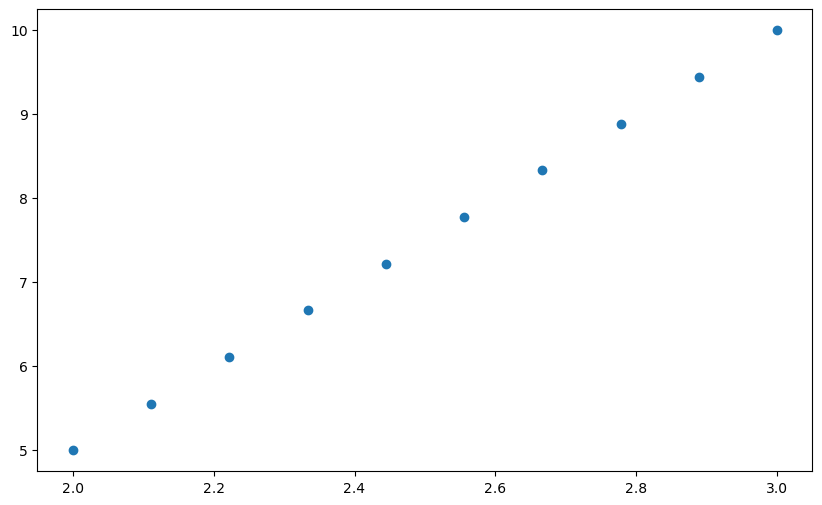

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(a, b)
plt.show()

In [24]:
X = a.reshape(-1,1) # this  has shape (XXX, 1) - it's 2D
Y = b.reshape(-1,1) # this  has shape (XXX, 1) - it's 2D

In [25]:
type(X)

numpy.ndarray

In [26]:
regression = LinearRegression()

In [27]:
regression.fit(X, Y) 

LinearRegression()

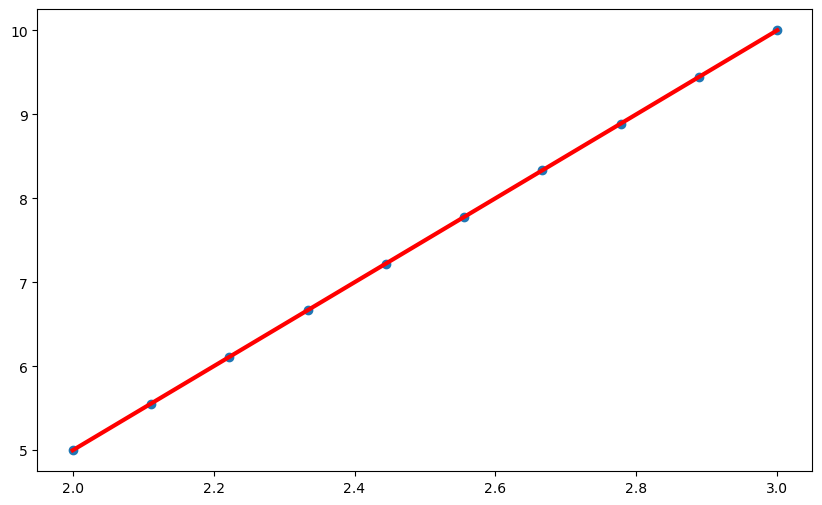

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)
plt.show()

In [29]:
regression.score(X, Y)

1.0